In [75]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import joblib
import numpy as np

In [76]:
from load_data_MLHC import load_test_data

## Run only for the first time
# X_test, y_test = load_test_data()

## Run after you got data in .npy format
X_test, y_test = np.load('x_test_MLHC.npy'), np.load('y_test_MLHC.npy')

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import load_model

In [78]:
Model_healthy = load_model('../Layer-I/model_layer1/NN')
y_pred_healthy = Model_healthy.predict(X_test)
y_true_healthy = y_test

In [79]:
# For NN
y_pred_healthy_NN = np.argmax(y_pred_healthy,axis=1)
position = []
y_pred_multiclass = []

for i in range(len(y_pred_healthy_NN)):
    if y_pred_healthy_NN[i] == 1:
        y_pred_multiclass.append(2)
        position.append(i)

In [80]:
# # For ML
# position = []
# y_pred_multiclass = []

# for i in range(len(y_pred_healthy)):
#     if y_pred_healthy[i] == 1:
#         y_pred_multiclass.append(2)
#         position.append(i)

In [81]:
X_test_multiclass = []
y_true_multiclass = []

In [82]:
X_test = X_test.tolist()
y_test = y_test.tolist()
for i in reversed(range(len(position))):
    
    pop_x = X_test.pop(position[i])
    pop_y = y_test.pop(position[i])
    X_test_multiclass.append(pop_x)
    y_true_multiclass.append(pop_y)

In [83]:
print(len(X_test_multiclass))
print(len(y_true_multiclass))
print(len(y_pred_multiclass))

404
404
404


In [84]:
print(len(X_test))
print(len(y_test))

856
856


In [85]:
Model_COVID = joblib.load('../Layer-II/model_layer2/Layer2_SVM.model')
y_pred_COVID = Model_COVID.predict(X_test)
y_true_COVID = y_test

In [86]:
# For ML
y_pred_COVID = y_pred_COVID.tolist()

In [87]:
# #For ML
print(classification_report(y_true_multiclass+y_true_COVID, y_pred_multiclass+y_pred_COVID, target_names=["COVID-19","Non-COVID-19","Healthy"]))
cnf_matrix = confusion_matrix(y_true_multiclass+y_true_COVID, y_pred_multiclass+y_pred_COVID)
print('=' * 100)
print(cnf_matrix)
print('=' * 100)

              precision    recall  f1-score   support

    COVID-19       0.98      0.99      0.98       420
Non-COVID-19       0.93      0.96      0.94       420
     Healthy       0.96      0.93      0.94       420

    accuracy                           0.96      1260
   macro avg       0.96      0.96      0.96      1260
weighted avg       0.96      0.96      0.96      1260

[[415   2   3]
 [  6 402  12]
 [  4  27 389]]


In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [89]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[415   2   3]
 [  6 402  12]
 [  4  27 389]]


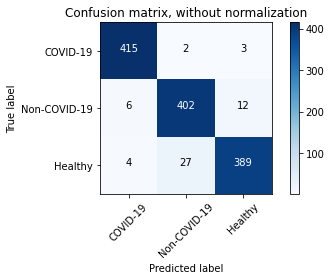

In [90]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["COVID-19","Non-COVID-19","Healthy"],
                      title='Confusion matrix, without normalization')